In [ ]:
#Comando para instalar cartopy e basemap
!wget https://anaconda.org/conda-forge/cartopy/0.16.0/download/linux-64/cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!tar xvjf cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install shapely pyshp
!apt install libproj-dev libgeos-dev
!pip install metpy
!sudo pip3 install -U git+https://github.com/matplotlib/basemap.git
!pip install netCDF4
!pip install --no-binary shapely shapely --force
!pip install goespy
!sudo apt-get install python-grib

In [6]:
import matplotlib.pyplot as plt 
from netCDF4 import Dataset
import netCDF4 as nc 
from mpl_toolkits.basemap import Basemap 
from google.colab import drive
from matplotlib.colors import LinearSegmentedColormap 
from datetime import datetime, timedelta   
from pyproj import Proj
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import cartopy
import cartopy.io.shapereader as shpreader

In [7]:
#!pip install siphon
!sudo apt-get install python-grib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-grib is already the newest version (2.0.2-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [37]:
from goespy.Downloader import ABI_Downloader
import os 


In [134]:
ABI_Downloader('noaa-goes16','2020','07','22','00','ABI-L2-CMIPF','C13')

Downloading... the product ABI-L2-CMIPF 
OR_ABI-L2-CMIPF-M6C13_G16_s20202040050257_e20202040059576_c20202040100079.nc: [##########] 100%  27.24987 MB/27.24987 MB

0

In [142]:
!cp /root/goes16/2020/07/22/ABI-L2-CMIPF/00/C13/* ./

In [187]:
!wget https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20200722/00/gfs.t00z.pgrb2.0p25.f000

--2020-07-22 22:10:42--  https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20200722/00/gfs.t00z.pgrb2.0p25.f000
Resolving nomads.ncep.noaa.gov (nomads.ncep.noaa.gov)... 140.172.138.18
Connecting to nomads.ncep.noaa.gov (nomads.ncep.noaa.gov)|140.172.138.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308818936 (295M) [text/plain]
Saving to: ‘gfs.t00z.pgrb2.0p25.f000.1’

gfs.t00z.pgrb2.0p25 100%[===================>] 294.51M  49.4MB/s    in 6.5s    

2020-07-22 22:10:49 (45.0 MB/s) - ‘gfs.t00z.pgrb2.0p25.f000.1’ saved [308818936/308818936]



In [143]:
#abrir arquivo###############################
import netCDF4 as nc
arq = nc.Dataset('OR_ABI-L2-CMIPF-M6C13_G16_s20202040050257_e20202040059576_c20202040100079.nc')

In [144]:
####realizando produto inicio de chuva ##########

data1 = arq.variables['CMI'][:]
print(data1)


[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


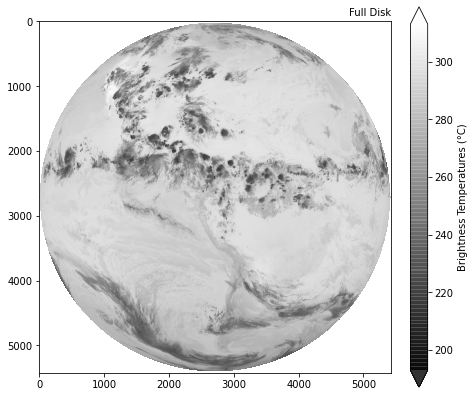

In [145]:
#Plotagem simples
plt.figure(figsize=(7,7))

plt.imshow(data1, vmin=193, vmax=313 , cmap='gray', alpha=0.8)
plt.colorbar(label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)
plt.title('GOES-16 Band 13', fontweight='bold', fontsize=10, loc='right')
plt.title('Full Disk', fontsize=10, loc='right')
plt.show()
 


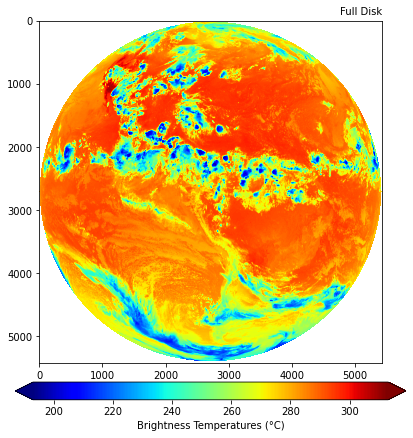

In [146]:
#Plotagem simples
plt.figure(figsize=(7,7))
plt.imshow(data1, vmin=193, vmax=313, cmap='jet')
plt.colorbar(label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)
plt.title('GOES-16 Band 13', fontweight='bold', fontsize=10, loc='right')
plt.title('Full Disk', fontsize=10, loc='right')
plt.show()
 

In [148]:
#Convertendo lat e lon do satélite
#As coordenadas de projeção x e y são iguais
# o ângulo de varredura (em radianos) multiplicado pela altura do satélite

sat_h= arq.variables['goes_imager_projection'].perspective_point_height
sat_lon = arq.variables['goes_imager_projection'].longitude_of_projection_origin
sat_var = arq.variables['goes_imager_projection'].sweep_angle_axis
print(sat_h)

35786023.0


In [149]:
X = arq.variables['x'][:][::4] * sat_h
Y = arq.variables['y'][:][::4] * sat_h
print(X)
print(Y)

[-5433893.  -5425877.  -5417860.5 ...  5411849.   5419865.   5427881. ]
[ 5433893.   5425877.   5417860.5 ... -5411849.  -5419865.  -5427881. ]


In [150]:
p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_var, a=6378137.0)

XX, YY = np.meshgrid(X, Y)
lons, lats = p(XX, YY, inverse=True)

In [151]:
mask = (lons == lons[0][0])
lons[mask] = -9999
lats[mask] = -9999

In [152]:
#Salvando as lat e lon de referência
np.savetxt('g16_lons_8km.txt', lons, fmt='%.2f')
np.savetxt('g16_lats_8km.txt', lats, fmt='%.2f')

In [153]:
#Teste 01############################################################################################################################################

dados = nc.Dataset('OR_ABI-L2-CMIPF-M6C13_G16_s20202040050257_e20202040059576_c20202040100079.nc','r')
# Desired visualization extent [min_lon, max_lon, min_lat, max_lat]
min_lon, max_lon, min_lat, max_lat = -80.0, -30.0, -34.0, 10.0
#-60,lat2=10,lon1=-80,lon2=-30
extent = [min_lon, min_lat, max_lon, max_lat]

In [154]:
lats = np.loadtxt('g16_lats_8km.txt')
lons = np.loadtxt('g16_lons_8km.txt')
ref_grid_resolution_km = 8
print(lats,lons)

[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]] [[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


In [155]:
# Calculate the lat lon pairs indexes for the desired extent
idx_pair_1 = abs(lats-extent[1])+abs(lons-extent[0])
max_lat_idx,min_lon_idx = np.unravel_index(idx_pair_1.argmin(),idx_pair_1.shape)
idx_pair_2 = abs(lats-extent[3])+abs(lons-extent[2])
min_lat_idx,max_lon_idx = np.unravel_index(idx_pair_2.argmin(),idx_pair_2.shape)

In [156]:
# Get the image resolution
band_resolution_km = getattr(dados, 'spatial_resolution')
band_resolution_km = float(band_resolution_km[:band_resolution_km.find("km")])

In [157]:
# Adapt the reference indexes for the current file resolution
min_lat_idx = min_lat_idx * int(ref_grid_resolution_km/band_resolution_km)
min_lon_idx = min_lon_idx * int(ref_grid_resolution_km/band_resolution_km)
max_lat_idx = max_lat_idx * int(ref_grid_resolution_km/band_resolution_km)
max_lon_idx = max_lon_idx * int(ref_grid_resolution_km/band_resolution_km)

In [158]:
sat_h = dados.variables['goes_imager_projection'].perspective_point_height
x = dados.variables['x'][min_lon_idx:max_lon_idx] * sat_h
y = dados.variables['y'][min_lat_idx:max_lat_idx] * sat_h
 

In [159]:
print(min_lat_idx)

2188


In [160]:
# Get the pixel values
data = dados.variables['CMI'][min_lat_idx:max_lat_idx,min_lon_idx:max_lon_idx][::1,::1]
print(data)


[[269.24805 270.16986 268.81787 ... 289.712   289.95782 290.20364]
 [260.58313 263.28708 259.477   ... 289.95782 290.08072 290.20364]
 [254.99088 261.07477 259.59988 ... 290.32654 290.08072 290.0193 ]
 ...
 [271.64474 275.76212 272.9967  ... 221.31445 230.34811 247.00195]
 [274.8403  277.17554 277.54425 ... 223.77261 240.11917 253.02438]
 [278.09732 280.30966 283.07504 ... 232.49896 249.76736 253.02438]]


In [161]:
###### Sobrepondo satélite com gfs#####################

In [93]:
import pygrib
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygrib


In [94]:
 !pip install geojsoncontour
 import geojsoncontour

In [254]:
# USANDO FORMATO Grib 
grib = ('gfs.t00z.pgrb2.0p25.f000.1');
gr = pygrib.open(grib)
dado = gr[361]
grb = gr.select(name='Temperature')[34]


data, lats, lons = grb.data(lat1=-60,lat2=10,lon1=280,lon2=350)
print(grb)

404:Temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202007220000


In [ ]:
for g in gr:
    print(g)

In [239]:
x = nc.Dataset('OR_ABI-L2-CMIPF-M6C13_G16_s20202040050257_e20202040059576_c20202040100079.nc','r')
data1 = x.variables['CMI'][min_lat_idx:max_lat_idx,min_lon_idx:max_lon_idx][::1,::1]

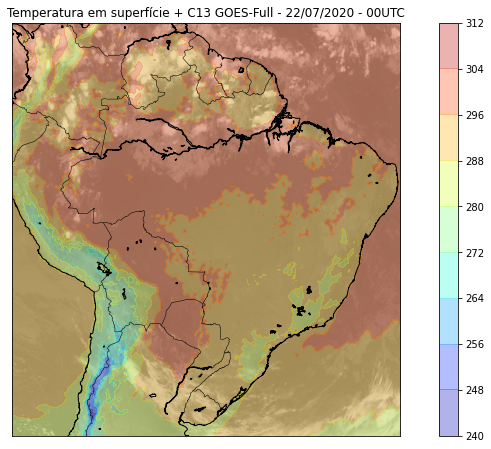

In [256]:
m = Basemap(projection='geos',lon_0=-75.0,lat_0=0.0,llcrnrlat=-36,urcrnrlat=10,\
            llcrnrlon=280,urcrnrlon=326,satellite_height=35786023.0, ellps='GRS80',resolution='i')

#Função Matplotlib para definir o tamanho da figura.
plt.figure(figsize=(8,10))

#Inserindo os lat e lon a figura criada pelo Basemap e vinculando às variavéis  x e y
x, y = m(lons, lats)

#Função do Basemap para iserir ao mapa continentes, países e estados.
m.drawcoastlines()
m.drawcountries()
#m.drawstates()

#Função do Basemap para realizar a interpolação e criação de polígonos
contour= m.contourf(x, y, np.squeeze(data),cmap='jet',alpha=0.3)

m.colorbar(contour, location='right', pad="10%")

m.imshow(data1, origin='upper', vmin=170, vmax=378,cmap = 'Greys', alpha=1.)

#Inserir titulo a imagem 

plt.title('Temperatura em superfície + C13 GOES-Full - 22/07/2020 - 00UTC')

#Plotar imagem
plt.show()

In [ ]:
m = Basemap(projection='geos',lon_0=-75.0,lat_0=0.0,llcrnrlat=-60,urcrnrlat=10,\
            llcrnrlon=280,urcrnrlon=340,satellite_height=35786023.0, ellps='GRS80',resolution='i')

#Função Matplotlib para definir o tamanho da figura.
plt.figure(figsize=(8,10))

#Inserindo os lat e lon a figura criada pelo Basemap e vinculando às variavéis  x e y
x, y = m(lons, lats)

#Função do Basemap para iserir ao mapa continentes, países e estados.
m.drawcoastlines()
m.drawcountries()
m.drawstates()

#Função do Basemap para realizar a interpolação e criação de polígonos
contour= m.contourf(x, y, np.squeeze(data),cmap='jet')

m.colorbar(contour, location='right', pad="10%")


m.imshow(data1,origin='upper', vmin=170, vmax=378, cmap='Greys')

#Inserir titulo a imagem 

plt.title('Temperatura_500hpa + C09 GOES-Full - 04/08/2019 - 00UTC')

#Plotar imagem
plt.show()